In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [5]:
# Load the Dataset
import pandas as pd

# Load dataset
df = pd.read_csv('/content/Customer_Data.csv')

# Basic Exploration
print('Shape of the Dataset: ',df.shape)
print("\nMissing Values: ",df.isnull().sum())
print("\nDuplicate Entries: ",df.duplicated().sum())
print("\nData Types:\n",df.dtypes)
print("\nSummary statistics:\n",df.describe())

Shape of the Dataset:  (8950, 18)

Missing Values:  CUSTID                                0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Duplicate Entries:  0

Data Types:
 CUSTID                               object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ON

In [10]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select numerical features for scaling
features = [
    'BALANCE',
    'PURCHASES',
    'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE',
    'CREDIT_LIMIT',
    'PAYMENTS',
    'MINIMUM_PAYMENTS'
]

# Drop rows with missing values in selected features (optional but safe)
df_cleaned = df[features].dropna()

# Initialize and apply scaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cleaned)

# Convert scaled array to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features)

# Preview the result
print(scaled_df.head())


    BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0 -0.744625  -0.429184         -0.359160               -0.354826   
1  0.764152  -0.473208         -0.359160               -0.458839   
2  0.426602  -0.116413          0.099909               -0.458839   
3 -0.373910  -0.465825         -0.349660               -0.458839   
4  0.099551   0.142062         -0.359160                0.994815   

   CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  
0     -0.468655     -0.962575 -0.543942         -0.305508  
1      2.568556      0.677204  0.796852          0.087689  
2     -0.468655      0.813852 -0.399503         -0.099906  
3     -0.468655     -0.907916 -0.380165         -0.261131  
4     -0.468655     -0.743938 -0.132119          0.650363  


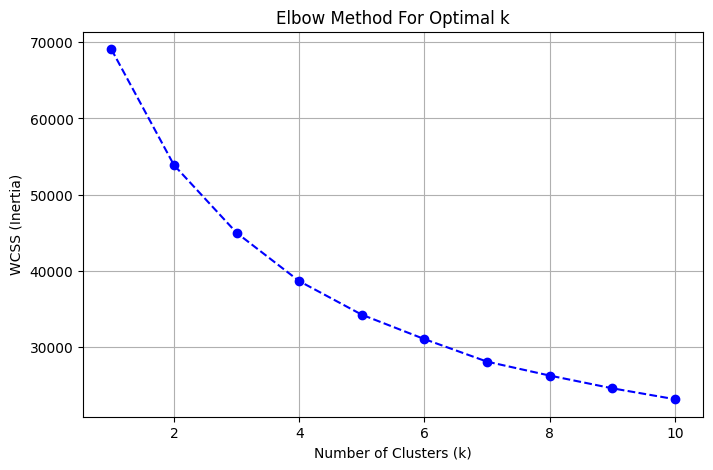

In [13]:
wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()


In [14]:
#STEP 4  Fit KMeans with optimal k
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_df)

# Add cluster labels to scaled data
scaled_df['Cluster'] = cluster_labels

# Optional: Add cluster labels to original cleaned data
df_clustered = df_cleaned.copy()
df_clustered['Cluster'] = cluster_labels


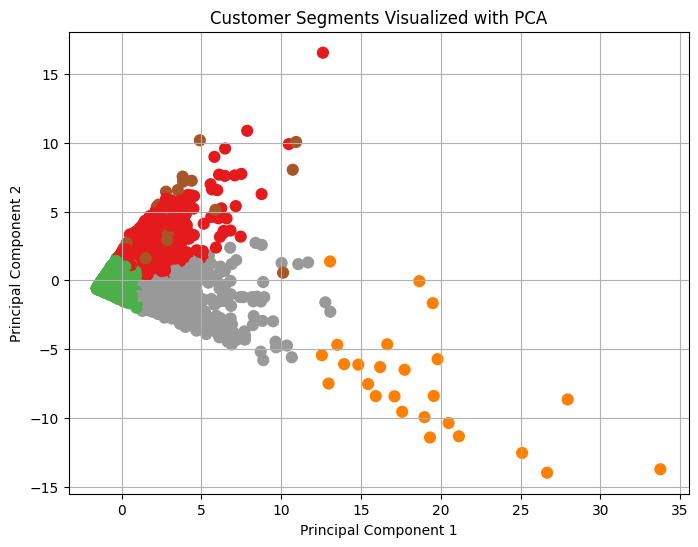

In [15]:
# STEP 5
# Reduce to 2D using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_df.drop('Cluster', axis=1))

# Plot the clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=scaled_df['Cluster'], cmap='Set1', s=60)
plt.title('Customer Segments Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [16]:
# Cluster-Based Recommendations & Insights
# Check average values per cluster
cluster_profiles = df_clustered.groupby('Cluster').mean()

# Display the cluster profiles
print(cluster_profiles)

# Optional: Count customers per cluster
print(df_clustered['Cluster'].value_counts())


             BALANCE     PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
Cluster                                                                        
0        5209.108983    622.657592        388.543481              234.174482   
1         901.024708    588.074520        311.190012              277.171882   
2        5351.546106  27085.309200      21002.018800             6083.290400   
3        4198.879263   1015.998727        181.689455              834.309273   
4        2367.418551   5171.732267       3224.941802             1947.797973   

         CASH_ADVANCE  CREDIT_LIMIT      PAYMENTS  MINIMUM_PAYMENTS  
Cluster                                                              
0         4481.955500   8835.441430   3870.052501       1807.817374  
1          470.647193   3384.511663   1026.316168        498.446170  
2         1488.363253  16360.000000  27159.043527       3201.825604  
3         1296.631170   4457.272727   1806.563818      23098.440133  
4          473.3164

| Cluster | Profile Summary                  | Recommendation                           |
| ------- | -------------------------------- | ---------------------------------------- |
| 0       | Low balance, low purchases       | May need incentives to increase spending |
| 1       | High balance, high payments      | Likely premium customers – offer rewards |
| 2       | High cash advance, low purchases | Risk of debt – monitor credit behavior   |
| 3       | High one-off purchases           | Target for flash sales or discounts      |
| 4       | Balanced across all              | Retain with loyalty offers               |
